In [1]:
# initialized based on colab code but run locally 

path_prefix = "C:/Users/tania/OneDrive - TM-IT Consulting Inc/Documents/4th yr/spring25/cmpt410/CMPT 726-410 Spring 2025 A2 starter code"

import os
import sys
sys.path.insert(1, path_prefix)

print(os.listdir(path_prefix))

['a2_classifier.ipynb', 'a2_siamese_net.ipynb', 'data', 'utils.py', '__pycache__']


In [2]:
from utils import *

torch.manual_seed(410)
np.random.seed(410)
random.seed(410)

In [3]:
transform = transforms.Compose([transforms.ToTensor()])
fashion_mnist_train = datasets.FashionMNIST(root=path_prefix + '/data/', train=True, download=True, transform=transform)
fashion_mnist_val = datasets.FashionMNIST(root=path_prefix + '/data/', train=False, download=True, transform=transform)

# print the size of the images
print(f"Training dataset shape: {fashion_mnist_train.data.shape}")
print(f"Validation dataset shape: {fashion_mnist_val.data.shape}")

Training dataset shape: torch.Size([60000, 28, 28])
Validation dataset shape: torch.Size([10000, 28, 28])


In [4]:
# # Specify the number of datapoints for training and validation
# n_train = 2048 # make this 60000 to train on the full training dataset in Part 2(d)
# n_val = 512 # make this 10000 to validate on the full validation dataset in Part 2(d)

# PART D
n_train = 60000 
n_val = 10000 

# take the first n_train samples for training and n_val samples for validation
train_idx = np.arange(n_train)
val_idx = np.arange(n_val)

# create a subset of FashionMNIST
train_dataset = torch.utils.data.Subset(fashion_mnist_train, train_idx)
val_datset = torch.utils.data.Subset(fashion_mnist_val, val_idx)

In [5]:
class DeepNeuralNet(nn.Module):
    def __init__(self, input_size, num_classes, layer_width=8):
        super(DeepNeuralNet, self).__init__()
        self.layers = nn.Sequential(
            nn.Flatten(),


            # PART B EXPERIMENTING WITH HIDDEN LAYER WIDTH 
            # # Define your neural network here
            # nn.Linear(input_size, 4), # hidden layer with 4 neurons
            # #nn.Linear(input_size, 8), # hidden layer with 8 neurons
            # #nn.Linear(input_size, 64), # hidden layer with 64 neurons
            # #nn.Linear(input_size, 128), # hidden layer with 128 neurons
            # #nn.Linear(input_size, 256), # hidden layer with 256 neurons
            # nn.ReLU(), # and ReLU activation
            # nn.Linear(4, num_classes) # output layer into 10 classes
            # #nn.Linear(8, num_classes) # output layer into 10 classes
            # #nn.Linear(64, num_classes) # output layer into 10 classes
            # #nn.Linear(128, num_classes) # output layer into 10 classes
            # #nn.Linear(256, num_classes) # output layer into 10 classes

    
            # # PART C ARCHITECTURE 1 (2 hidden layers)
            # # Define your neural network here
            # nn.Linear(input_size, 187), # hidden layer with 187 neurons
            # nn.ReLU(), # and ReLU activation
            # nn.Linear(187, 64), # hidden layer with 64 neurons
            # nn.ReLU(), # and ReLU activation
            # nn.Linear(64, num_classes) # output layer into 10 classes

            # # PART C ARCHITECTURE 2 (3 hidden layers)
            # # Define your neural network here
            # nn.Linear(input_size, 187), # hidden layer with 187 neurons
            # nn.ReLU(), # and ReLU activation
            # nn.Linear(187, 64), # hidden layer with 64 neurons
            # nn.ReLU(), # and ReLU activation
            # nn.Linear(64, 32), # hidden layer with 32 neurons
            # nn.ReLU(), # and ReLU activation
            # nn.Linear(32, num_classes) # output layer into 10 classes

            # # PART C ARCHITECTURE 3 (4 hidden layers)
            # # Define your neural network here
            # nn.Linear(input_size, 187), # hidden layer 1 with 187 neurons
            # nn.ReLU(), # and ReLU activation
            # nn.Linear(187, 64), # hidden layer 2 with 64 neurons
            # nn.ReLU(), # and ReLU activation
            # nn.Linear(64, 32), # hidden layer 3 with 32 neurons
            # nn.ReLU(), # and ReLU activation
            # nn.Linear(32, 16), # hidden layer 4 with 16 neurons
            # nn.ReLU(), # and ReLU activation
            # nn.Linear(16, num_classes) # output layer into 10 classes


            # PART D ARCHITECTURE (3 hidden layers, from part C)
            # Define your neural network here
            nn.Linear(input_size, 187), # hidden layer with 187 neurons
            nn.ReLU(), # and ReLU activation
            nn.Linear(187, 64), # hidden layer with 64 neurons
            nn.ReLU(), # and ReLU activation
            nn.Linear(64, 32), # hidden layer with 32 neurons
            nn.ReLU(), # and ReLU activation
            nn.Linear(32, num_classes) # output layer into 10 classes
            
        )

        self.sigmoid = nn.Sigmoid()
    
    def forward(self, x):
        # Define the forward pass here
        x = self.layers(x)
        x = self.sigmoid(x)
        
        return(x)



In [6]:
# Model initialization and summary
model = DeepNeuralNet(input_size = 784, num_classes = 10) # initialize the model here, input size = 28*28 = 784
summary(model.cpu(), [(1, 28, 28)]) # had to replace cuda with cpu for this to run on my device

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
           Flatten-1                  [-1, 784]               0
            Linear-2                  [-1, 187]         146,795
              ReLU-3                  [-1, 187]               0
            Linear-4                   [-1, 64]          12,032
              ReLU-5                   [-1, 64]               0
            Linear-6                   [-1, 32]           2,080
              ReLU-7                   [-1, 32]               0
            Linear-8                   [-1, 10]             330
           Sigmoid-9                   [-1, 10]               0
Total params: 161,237
Trainable params: 161,237
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.01
Params size (MB): 0.62
Estimated Total Size (MB): 0.63
-------------------------------------------

In [ ]:
# PART A
# Hyperparameters configuration
LEARNING_RATE = 0.001 # specify learning rate
# EPOCHS = 100 # for parts A-C
EPOCHS = 20 # for part D
BATCH_SIZE = 64 # specify the batch size
OPTIMIZER = torch.optim.Adam(model.parameters(), weight_decay=0, lr = LEARNING_RATE) # specify the optimizer in part A (also best)
#OPTIMIZER = torch.optim.SGD(model.parameters(), lr = LEARNING_RATE, momentum = 0.5) # PART D
loss_function = nn.MSELoss(reduction = 'sum') # specify the loss function


100%|██████████| 938/938 [00:12<00:00, 77.07it/s]


Epoch [5], train_loss: 11.5133, train_acc: 0.8779, val_loss: 12.1701, val_acc: 0.8705


100%|██████████| 938/938 [00:12<00:00, 76.87it/s]


Epoch [10], train_loss: 9.4510, train_acc: 0.8988, val_loss: 11.2871, val_acc: 0.8788


100%|██████████| 938/938 [00:11<00:00, 80.23it/s]


Epoch [15], train_loss: 8.2136, train_acc: 0.9147, val_loss: 10.6616, val_acc: 0.8887


100%|██████████| 938/938 [00:12<00:00, 76.17it/s]


Epoch [20], train_loss: 7.3799, train_acc: 0.9229, val_loss: 11.1018, val_acc: 0.8816


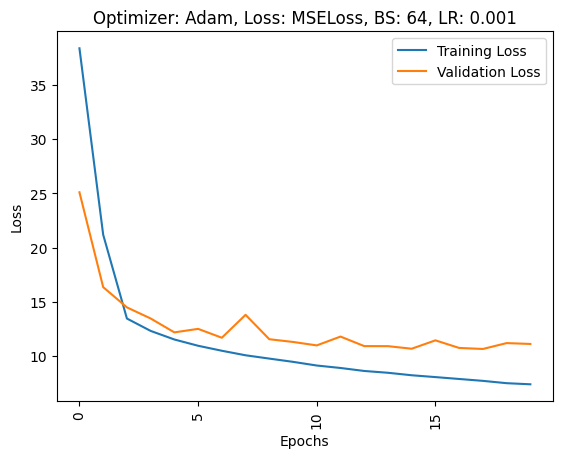

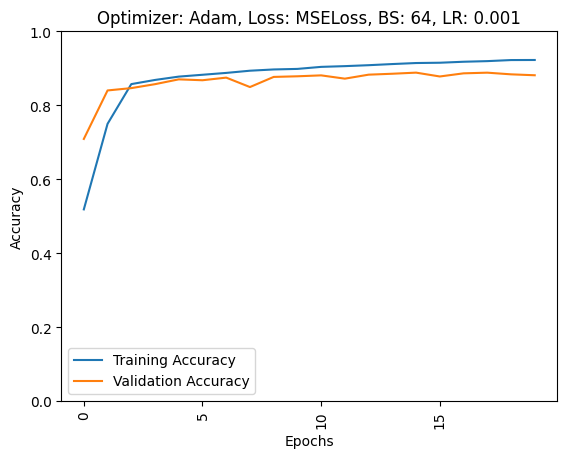

In [8]:
# Training the model
trainer = ClassifierTrainer(model, train_dataset, val_datset, loss_function, BATCH_SIZE, EPOCHS, OPTIMIZER, path_prefix) # TODO: initialize the classifier trainer here

train_loss, validation_loss, train_accuracy, validation_accuracy = trainer.train_loop()
trainer.plot_losses(train_loss, validation_loss)
trainer.plot_accuracies(train_accuracy, validation_accuracy)

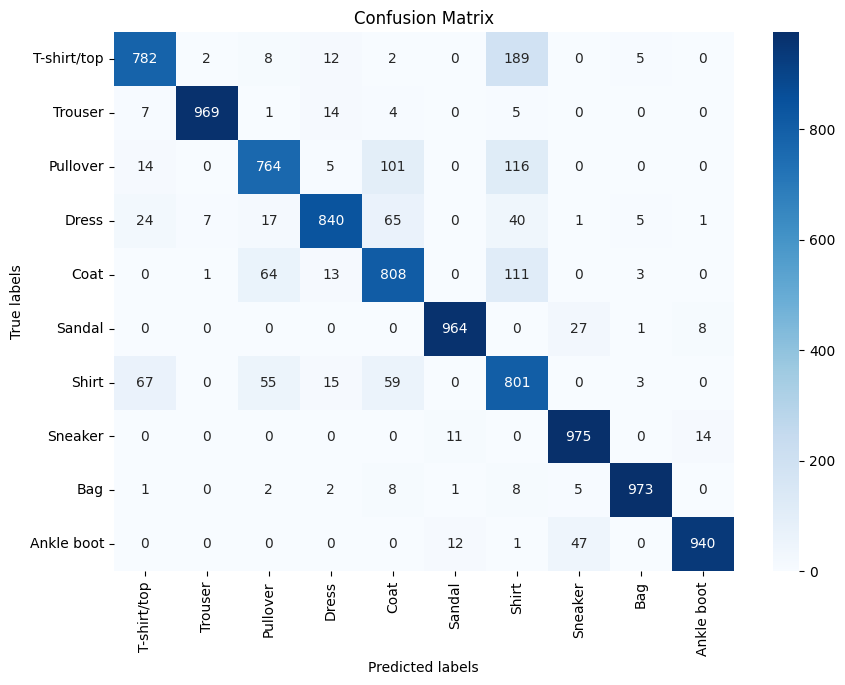

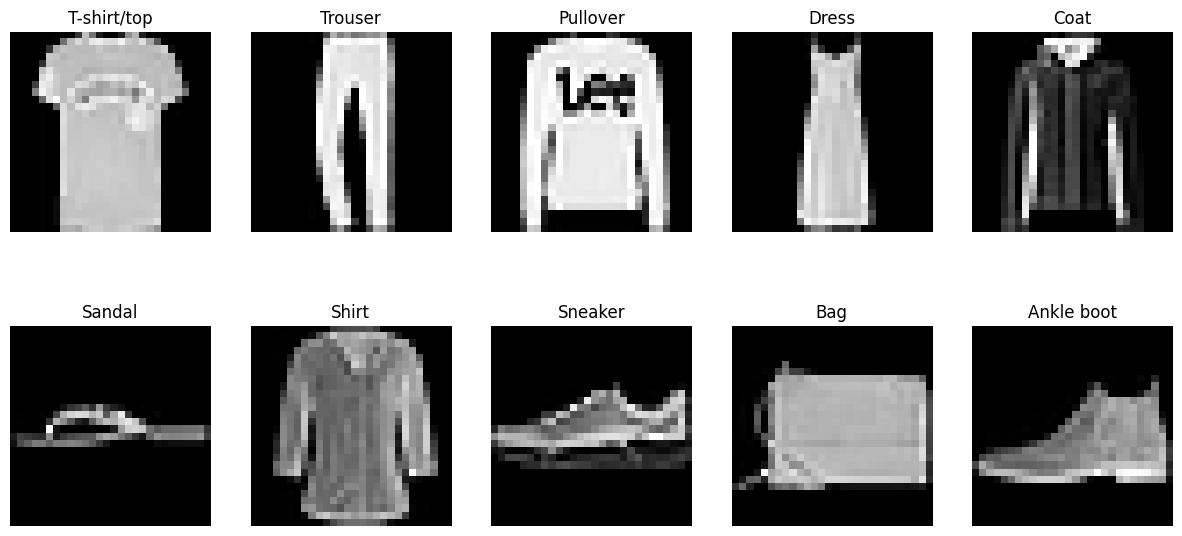

In [9]:
# Plot the confusion matrix and visualize samples from each class    
y_true = [y for _, y in val_datset]
y_pred = []
for img, _ in val_datset:
    img = img.cpu() # had to replace cuda with cpu for this to run on my machine
    y_pred.append(model(img).argmax().item())

plot_confusion_matrix(y_true, y_pred, classes=fashion_mnist_train.classes)
visualize_classes(fashion_mnist_val)